## Train Agent on Osu Environment using Nosiy Dueling LSTM DQN

In [1]:
from environment import OsuEnvironment
from agent import DQN_Agent
from model import LSTM_DQN
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# define arguments for Agent
env = OsuEnvironment(num_frame=8)
input_size = env.observation_space.shape[1] * env.observation_space.shape[2]
dueling_dqn = True
noisy_dqn = False
lstm = True
behavior_cloning = True

policy_net = LSTM_DQN(input_size, env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn, num_layers=1, dropout=0).to(device)
target_net = LSTM_DQN(input_size, env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn, num_layers=1, dropout=0).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.SGD(policy_net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

agent = DQN_Agent(env, policy_net, target_net, optimizer, noisy_dqn=noisy_dqn, lstm=lstm, behavior_cloning=behavior_cloning, epsilon_decay=300)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-11-25 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [ ]:
# transitions = agent.expert_replay.sample(128)
# state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*transitions)
# state_batch = torch.cat(state_batch)
# action_batch = torch.cat(action_batch)
# reward_batch = torch.cat(reward_batch)
# next_state_batch = torch.cat(next_state_batch)
# done_batch= torch.tensor([done for done in done_batch], dtype=torch.long, device=device)

In [ ]:
# for i in state_batch:
#     for a in i:
#         print(a)

In [3]:
agent.pretrain(margin=0.8, total_episode=200000)

Episod 10, pre-training loss: 2.7028775215148926
Episod 20, pre-training loss: 2.7565298080444336
Episod 30, pre-training loss: 3.093055248260498
Episod 40, pre-training loss: 2.2303826808929443
Episod 50, pre-training loss: 2.8697028160095215
Episod 60, pre-training loss: 2.4949185848236084
Episod 70, pre-training loss: 2.8003764152526855
Episod 80, pre-training loss: 2.473933458328247
Episod 90, pre-training loss: 2.705129861831665
Episod 100, pre-training loss: 2.374195098876953
Episod 110, pre-training loss: 2.405646562576294
Episod 120, pre-training loss: 2.5050606727600098
Episod 130, pre-training loss: 1.8632757663726807
Episod 140, pre-training loss: 2.3088464736938477
Episod 150, pre-training loss: 3.672854423522949
Episod 160, pre-training loss: 2.7721006870269775
Episod 170, pre-training loss: 3.682373523712158
Episod 180, pre-training loss: 2.2630016803741455
Episod 190, pre-training loss: 2.0191049575805664
Episod 200, pre-training loss: 3.0683772563934326
Episod 210, pre-

In [ ]:
agent.eval(total_episode=10)

In [3]:
agent.train(total_episode=100, margin=0.1)

Epsiode: 10: Total Reward: -144.30000000000004, Loss: 12.180183104106359
Epsiode: 20: Total Reward: -1147.0999999999992, Loss: 11.998294582757193
Epsiode: 30: Total Reward: -165.60000000000008, Loss: 12.105664348602295
Epsiode: 40: Total Reward: -115.30000000000013, Loss: 12.596335074480843
Epsiode: 50: Total Reward: -146.10000000000014, Loss: 11.854993923850682
Epsiode: 60: Total Reward: -119.50000000000001, Loss: 12.288989318044562
Epsiode: 70: Total Reward: -155.80000000000004, Loss: 12.950752187658239
Epsiode: 80: Total Reward: -125.90000000000002, Loss: 13.211036060167396
Epsiode: 90: Total Reward: -152.60000000000022, Loss: 12.905626660301571
Epsiode: 100: Total Reward: -744.5999999999971, Loss: 12.364263820648194


In [4]:
# ensure inline ploting is enable
%matplotlib inline

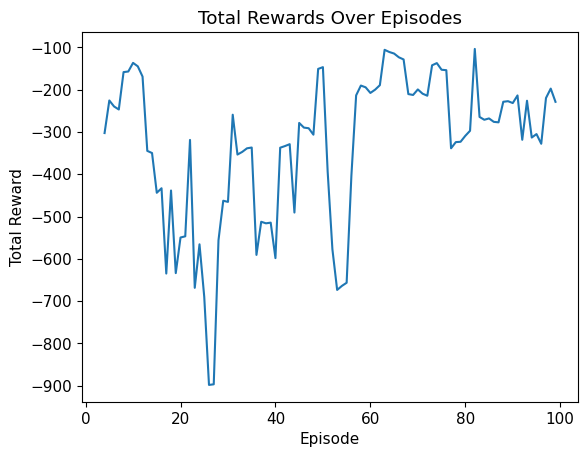

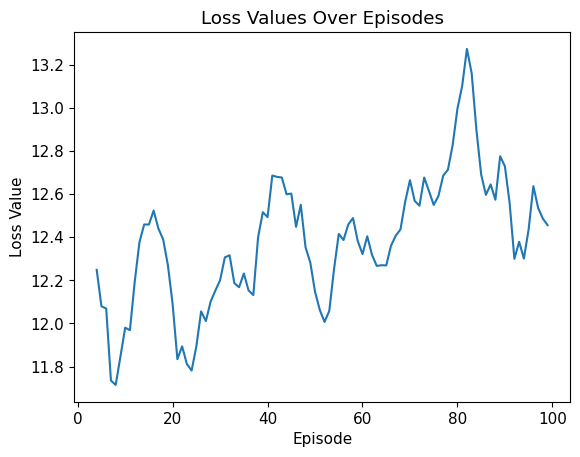

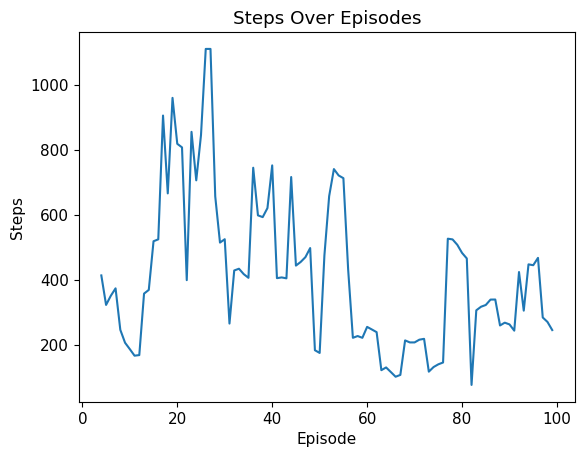

In [5]:
agent.plot()

In [6]:
agent.eval(total_episode=10)

KeyboardInterrupt: 